#### Pridicting Heart Disease by using Principal Component Analysis (PCA)

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Perform PCA and find the variance from 2 components


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
#lets import the dataset 
df= pd.read_csv("heart.pca.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# get the statistical analysis of dataset 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


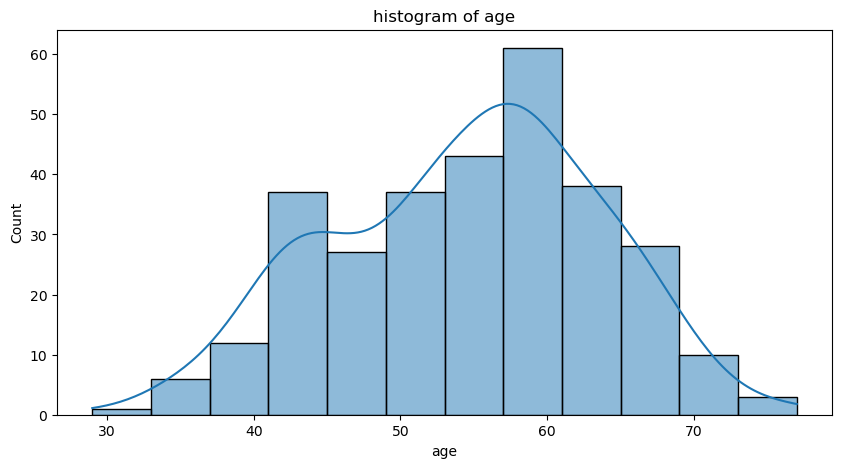

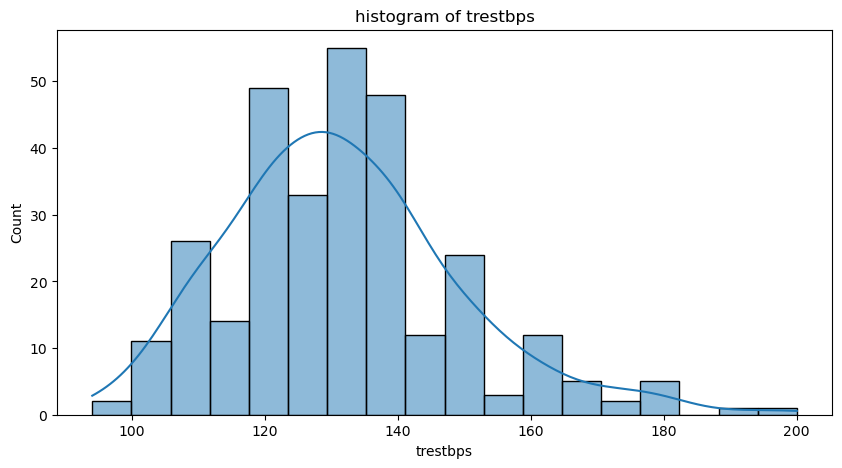

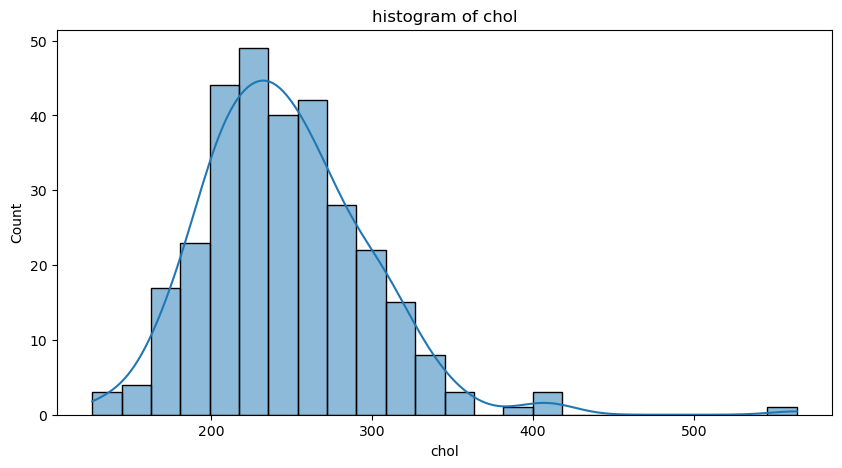

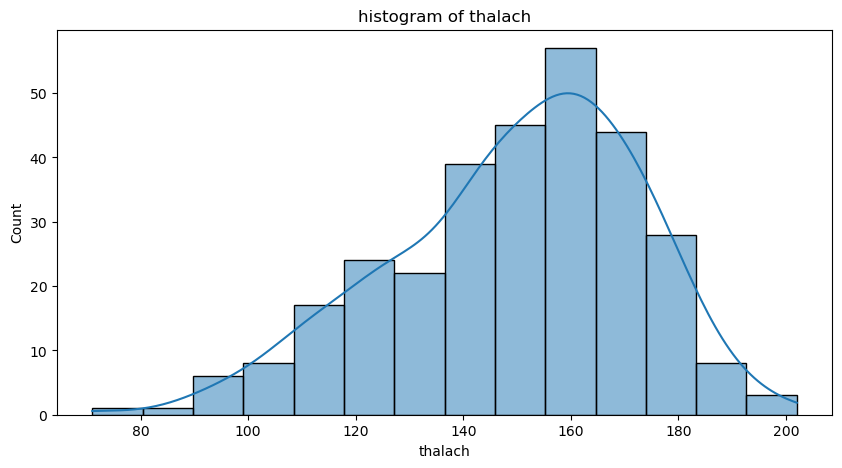

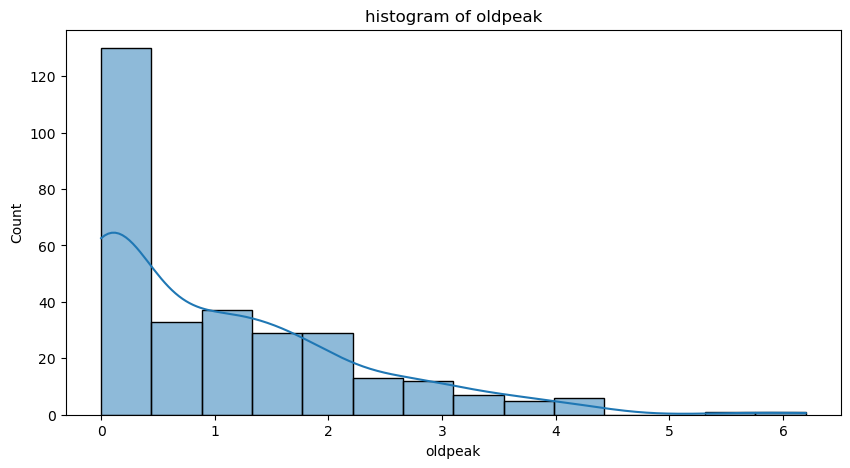

In [29]:
##univariate and bivariate analysis  
#histogram for continuous variables 

continuous_vars = ['age','trestbps','chol','thalach','oldpeak']
for var in continuous_vars :
    plt.figure(figsize= (10,5))
    sns.histplot(df[var], kde= True)
    plt.title(f'histogram of {var}')
    plt.show

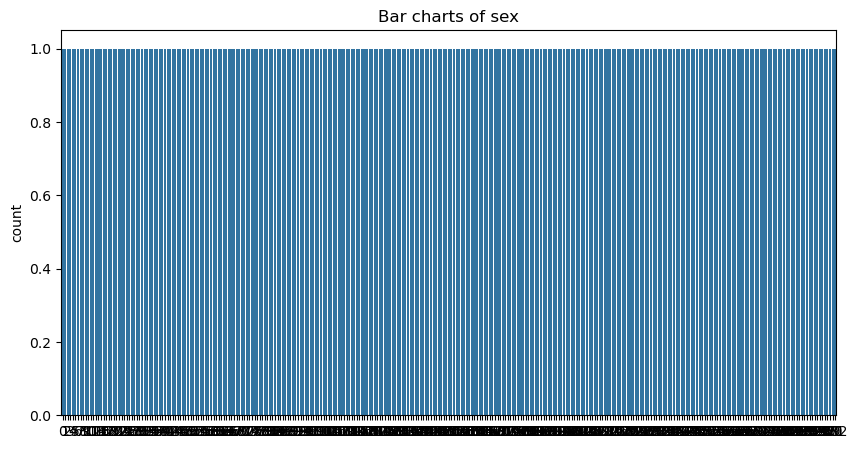

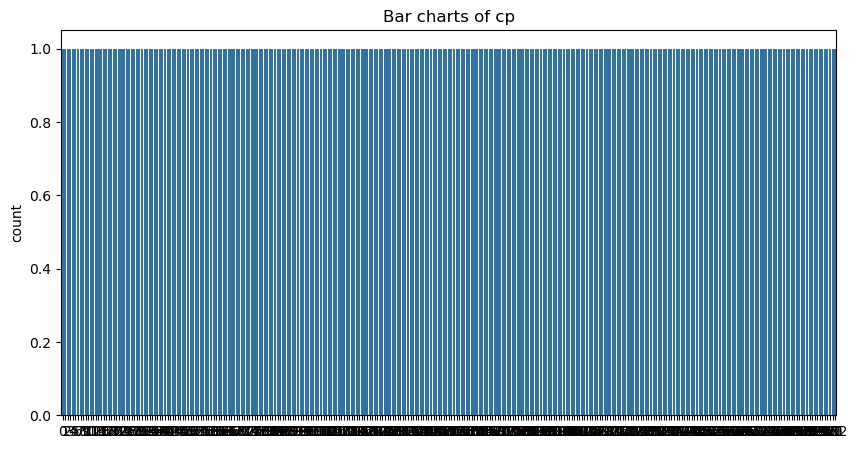

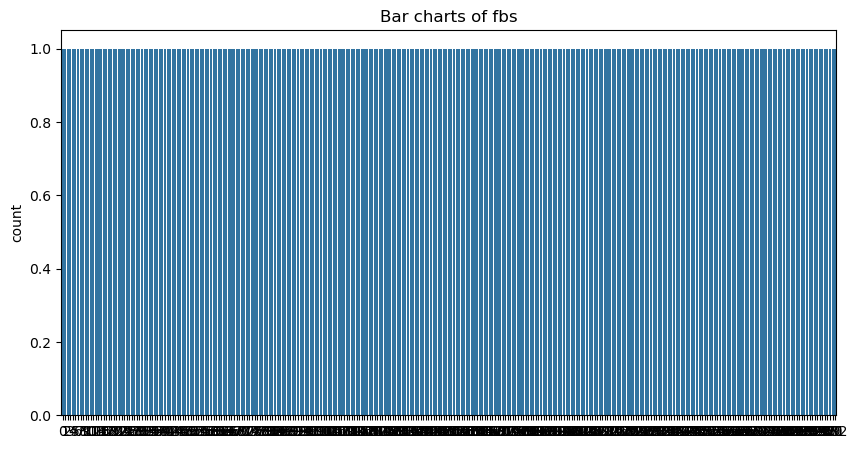

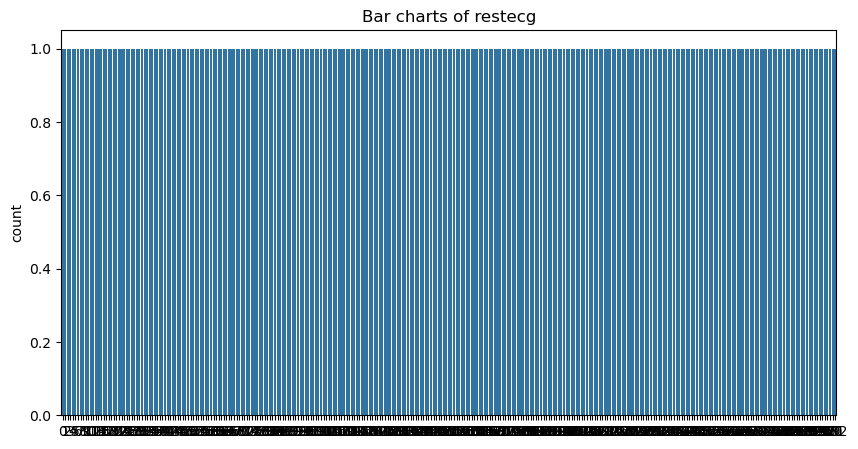

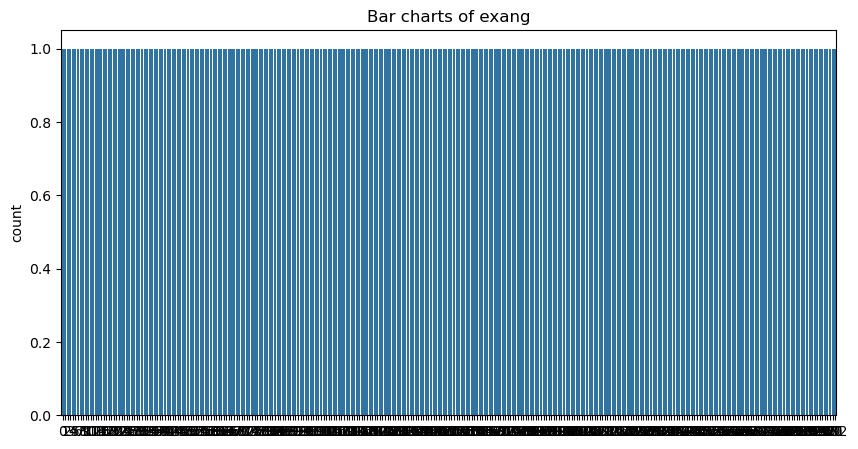

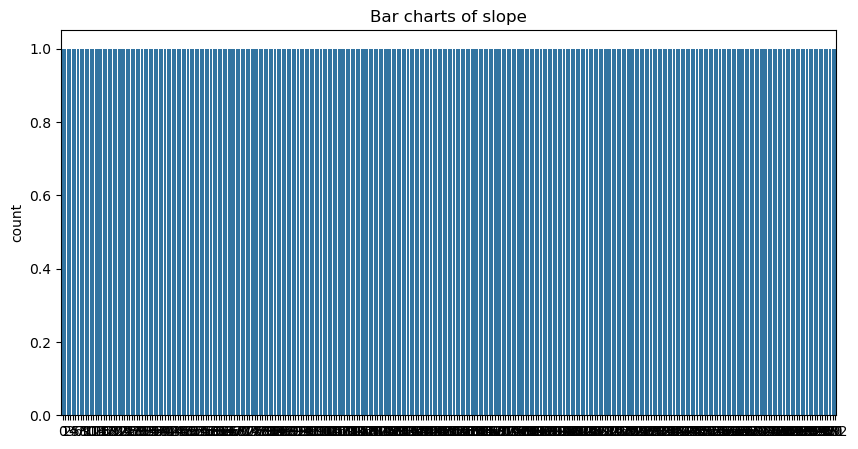

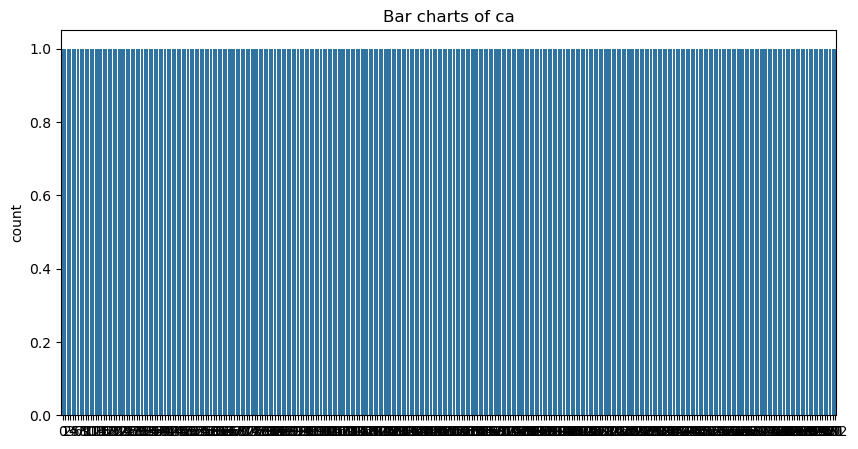

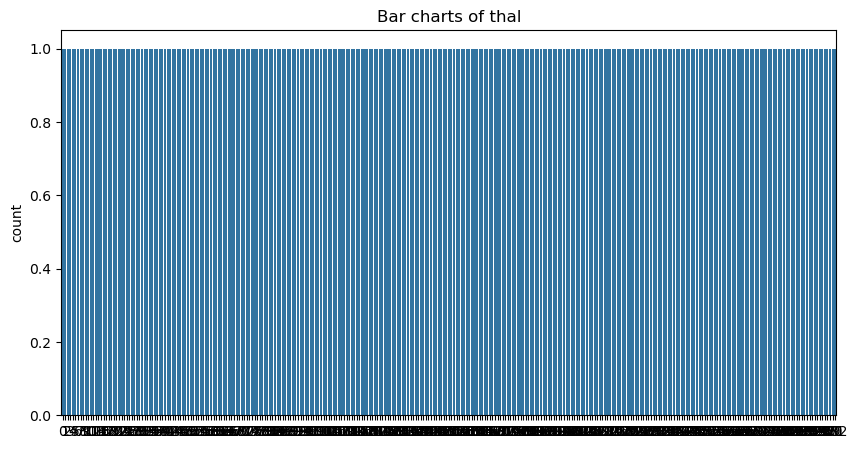

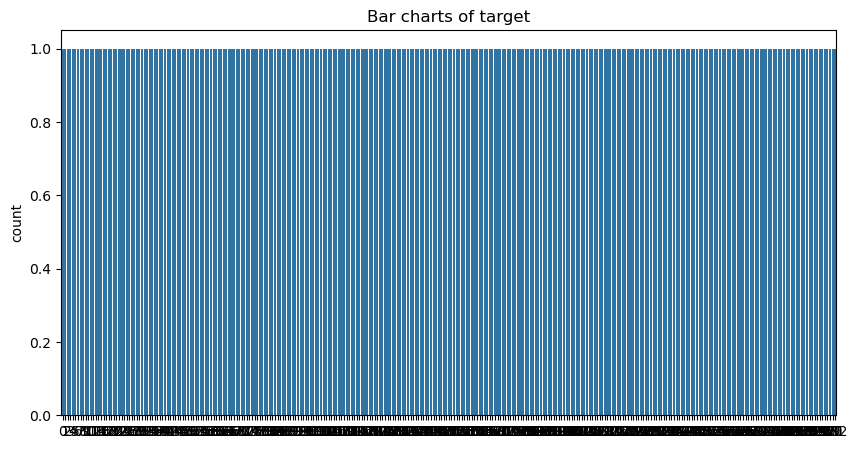

In [30]:
#Bar charts for categorical variables

categorical_vars =['sex', 'cp','fbs','restecg','exang','slope','ca','thal','target']
for var in categorical_vars :
    plt.figure(figsize= (10,5))
    sns.countplot(df[var])
    plt.title(f'Bar charts of {var}')
    plt.show
              

C:\Users\SKT\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<function matplotlib.pyplot.show(close=None, block=None)>

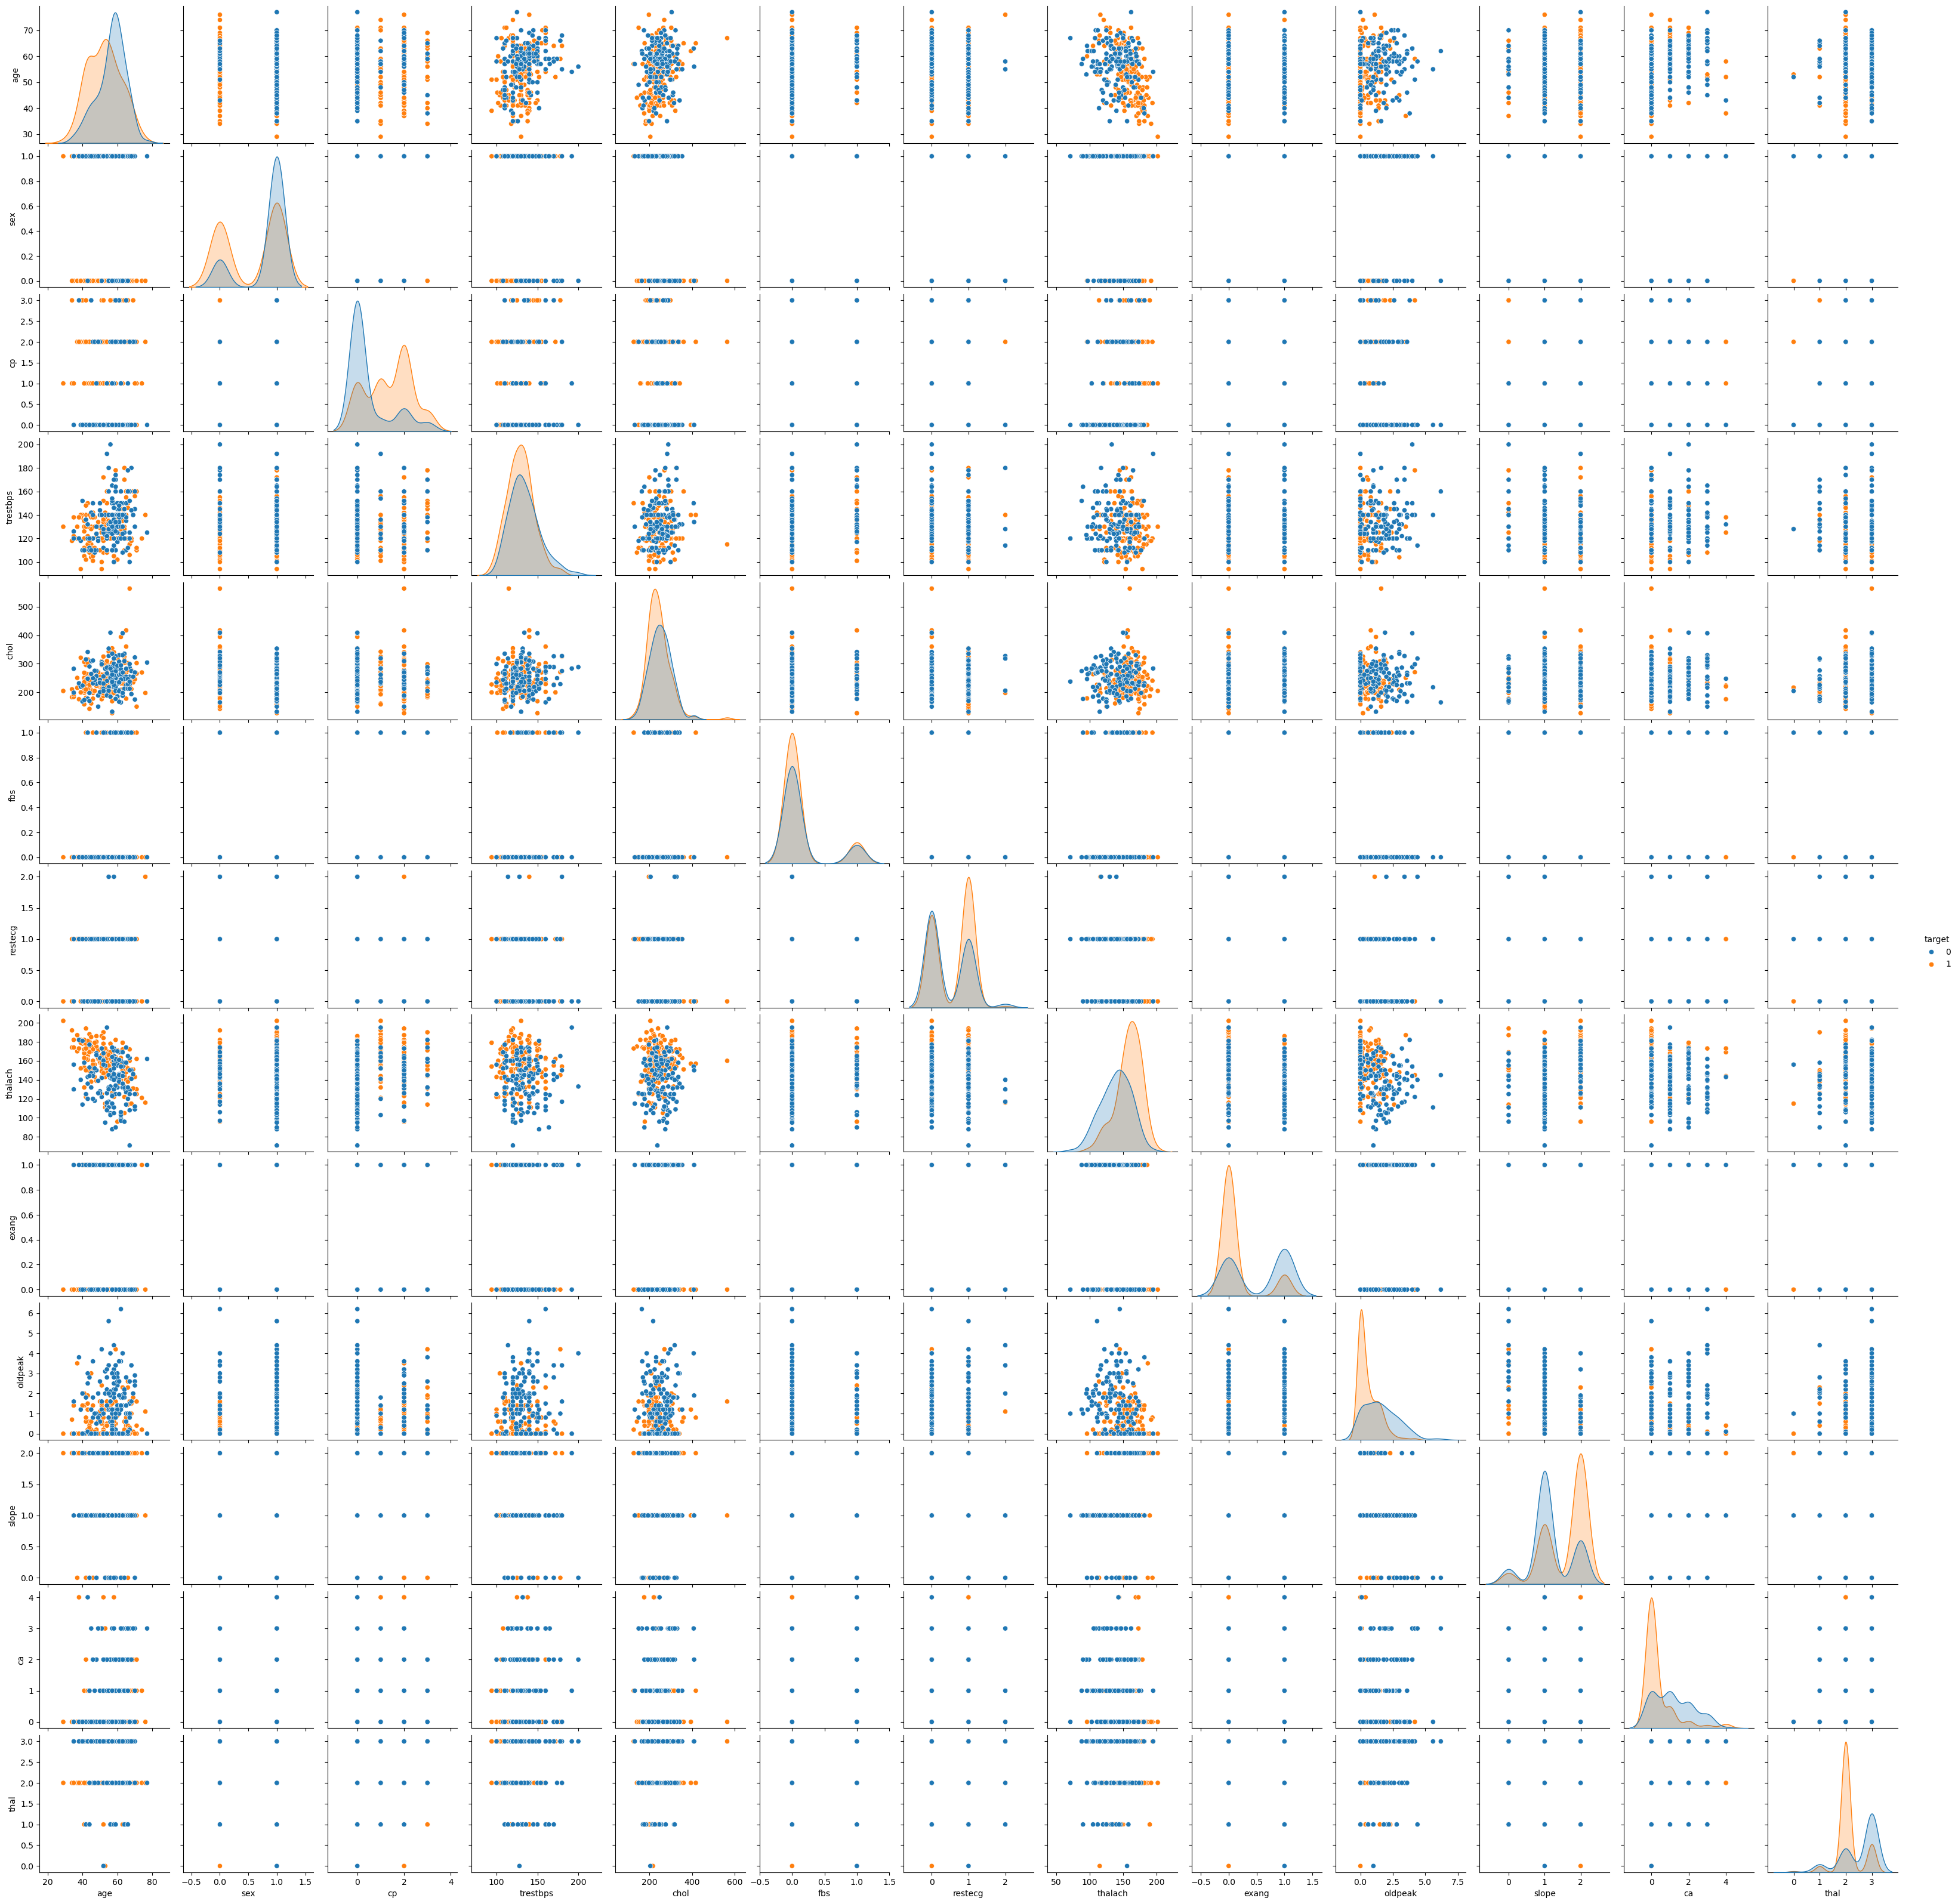

In [31]:
#Bivariate Analysis

#Pair plot for visualize relationship between pairs of features 
sns.pairplot(df, hue= 'target')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

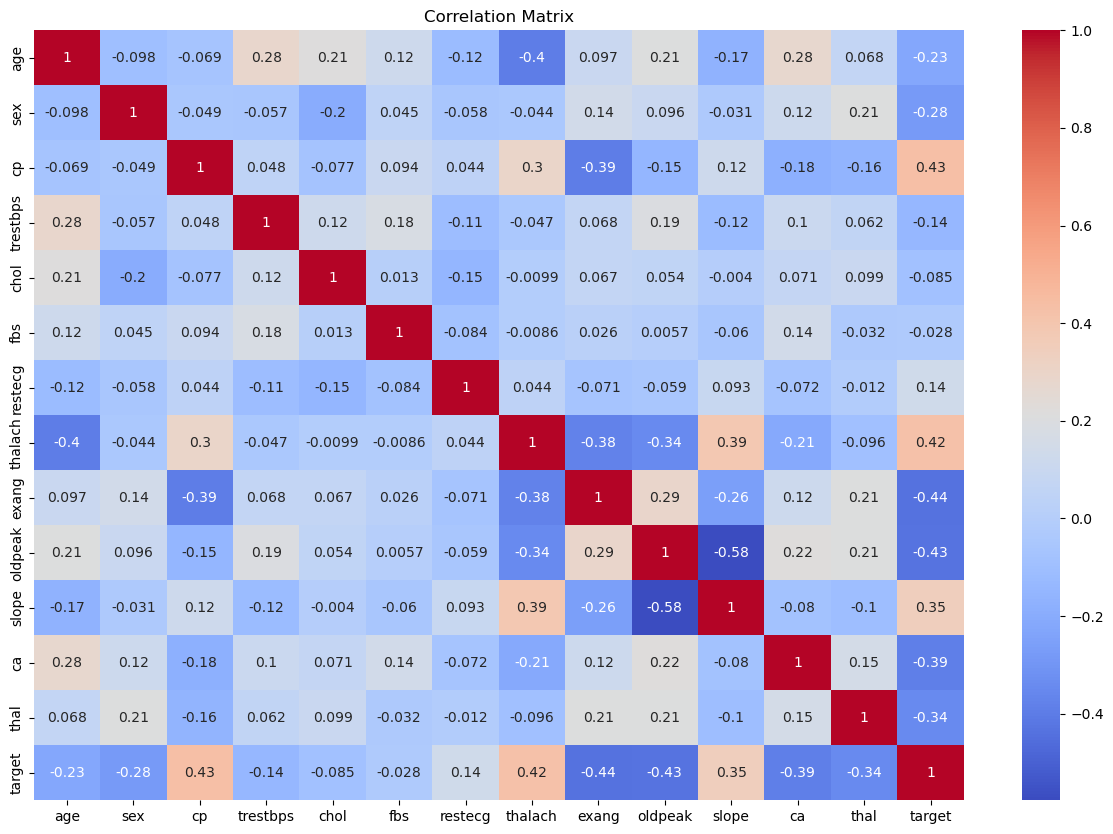

In [32]:
# heatmap for correlation matrix 
corr_mat = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot= True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show

In [33]:
#finding the correlation with target variable 
target_corr= corr_mat['target'].sort_values(ascending= False )
target_corr

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [34]:
#splitting the dataset into train and test 
X = df.drop("target", axis = 1)
y = df['target']

In [35]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\SKT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# check for the accuracy of the model 
from sklearn.metrics import accuracy_score 
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.8852459016393442


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
print("Precision Score:", precision)

recall = recall_score(y_test, y_pred)
print("Recall Score:", recall)

f1sc= f1_score(y_test, y_pred)
print("F1 Score:", f1sc)


Precision Score: 0.8787878787878788
Recall Score: 0.90625
F1 Score: 0.8923076923076922


In [41]:
#Performing PCA and finding Variasnce of 2 components 

#feature selecting ( excluding target feature)
features = df.drop(columns= ['target'])

In [42]:
#Standardizing the features 
scaler = StandardScaler()
features_scaled= scaler.fit_transform(features)


In [43]:
#Applying PCA

pca = PCA(n_components= 2 )
pca_components= pca.fit_transform(features_scaled)

In [44]:
#Explained Variance 

explained_variance= pca.explained_variance_ratio_
print(f'Explained variance by 2 components :{explained_variance.sum()}')

Explained variance by 2 components :0.330747608461794


        PC1       PC2  target
0  0.624111  2.321270       1
1 -0.455988 -0.957351       1
2 -1.828805  0.042885       1
3 -1.716006 -0.495337       1
4 -0.371356  0.301156       1


<function matplotlib.pyplot.show(close=None, block=None)>

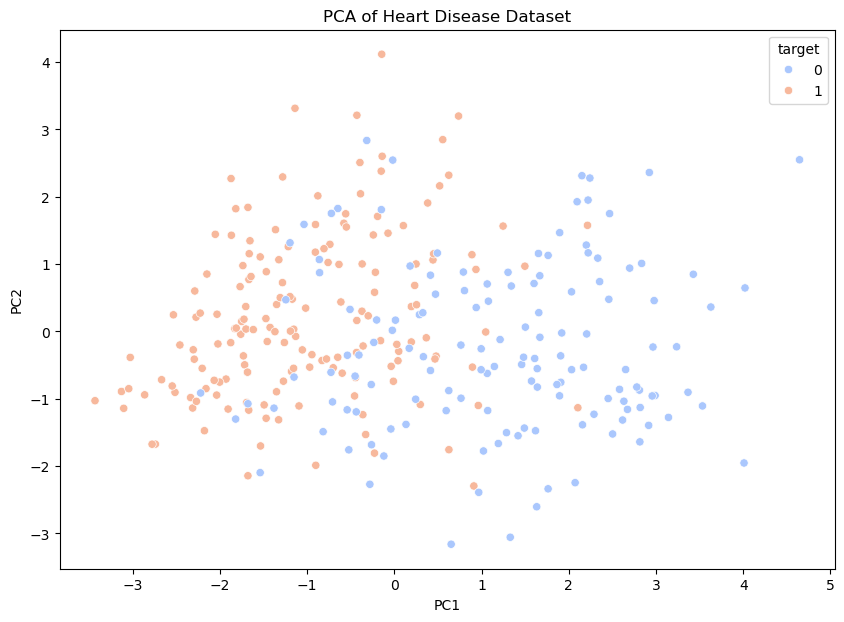

In [45]:
#creating the dataframe with target variable and pca results 

pca_df= pd.DataFrame(data= pca_components, columns = ['PC1','PC2'])
pca_df['target']= df['target'].values

print(pca_df.head())

plt.figure(figsize=(10,7))
sns.scatterplot(x= 'PC1', y = 'PC2' , hue = 'target', data = pca_df, palette= 'coolwarm')
plt.title("PCA of Heart Disease Dataset")
plt.show